# Installation of required libraries and basic setup

In [30]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# Testing the dataset 

In [10]:
# Testing the dataset 
path_single = r"TrainData/img/image_1.h5"
path_single_mask = r'TrainData/mask/mask_1.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


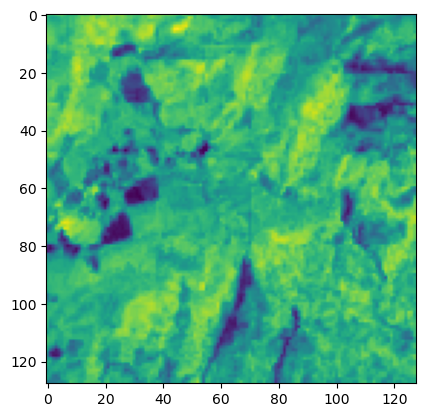

In [11]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


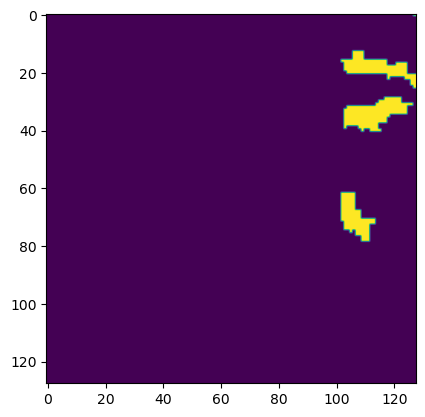

In [12]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [13]:
path_single = r"TrainData/img/image_10.h5"
path_single_mask = r'TrainData/mask/mask_1.h5'
TRAIN_PATH = r"TrainData/img/*.h5"
TRAIN_MASK = r'TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope 


In [14]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

2024-04-23 12:34:41.963833: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 12:34:41.971370: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 12:34:41.974851: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

'/device:GPU:0'

In [15]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 TrainData/img/image_1.h5 TrainData/mask/mask_1.h5
1 TrainData/img/image_10.h5 TrainData/mask/mask_10.h5
2 TrainData/img/image_100.h5 TrainData/mask/mask_100.h5
3 TrainData/img/image_1000.h5 TrainData/mask/mask_1000.h5
4 TrainData/img/image_1001.h5 TrainData/mask/mask_1001.h5
5 TrainData/img/image_1002.h5 TrainData/mask/mask_1002.h5
6 TrainData/img/image_1003.h5 TrainData/mask/mask_1003.h5
7 TrainData/img/image_1004.h5 TrainData/mask/mask_1004.h5
8 TrainData/img/image_1005.h5 TrainData/mask/mask_1005.h5
9 TrainData/img/image_1006.h5 TrainData/mask/mask_1006.h5
10 TrainData/img/image_1007.h5 TrainData/mask/mask_1007.h5
11 TrainData/img/image_1008.h5 TrainData/mask/mask_1008.h5
12 TrainData/img/image_1009.h5 TrainData/mask/mask_1009.h5
13 TrainData/img/image_101.h5 TrainData/mask/mask_101.h5
14 TrainData/img/image_1010.h5 TrainData/mask/mask_1010.h5
15 TrainData/img/image_1011.h5 TrainData/mask/mask_1011.h5
16 TrainData/img/image_1012.h5 TrainData/mask/mask_1012.h5
17 TrainData/img/imag

/tmp/ipykernel_18080/3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1769 TrainData/img/image_2591.h5 TrainData/mask/mask_2591.h5
1770 TrainData/img/image_2592.h5 TrainData/mask/mask_2592.h5
1771 TrainData/img/image_2593.h5 TrainData/mask/mask_2593.h5
1772 TrainData/img/image_2594.h5 TrainData/mask/mask_2594.h5
1773 TrainData/img/image_2595.h5 TrainData/mask/mask_2595.h5
1774 TrainData/img/image_2596.h5 TrainData/mask/mask_2596.h5
1775 TrainData/img/image_2597.h5 TrainData/mask/mask_2597.h5
1776 TrainData/img/image_2598.h5 TrainData/mask/mask_2598.h5
1777 TrainData/img/image_2599.h5 TrainData/mask/mask_2599.h5
1778 TrainData/img/image_26.h5 TrainData/mask/mask_26.h5
1779 TrainData/img/image_260.h5 TrainData/mask/mask_260.h5
1780 TrainData/img/image_2600.h5 TrainData/mask/mask_2600.h5
1781 TrainData/img/image_2601.h5 TrainData/mask/mask_2601.h5
1782 TrainData/img/image_2602.h5 TrainData/mask/mask_2602.h5
1783 TrainData/img/image_2603.h5 TrainData/mask/mask_2603.h5
1784 TrainData/img/image_2604.h5 TrainData/mask/mask_2604.h5
1785 TrainData/img/image_2605.

/tmp/ipykernel_18080/3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2406 TrainData/img/image_3164.h5 TrainData/mask/mask_3164.h5
2407 TrainData/img/image_3165.h5 TrainData/mask/mask_3165.h5
2408 TrainData/img/image_3166.h5 TrainData/mask/mask_3166.h5
2409 TrainData/img/image_3167.h5 TrainData/mask/mask_3167.h5
2410 TrainData/img/image_3168.h5 TrainData/mask/mask_3168.h5
2411 TrainData/img/image_3169.h5 TrainData/mask/mask_3169.h5
2412 TrainData/img/image_317.h5 TrainData/mask/mask_317.h5
2413 TrainData/img/image_3170.h5 TrainData/mask/mask_3170.h5
2414 TrainData/img/image_3171.h5 TrainData/mask/mask_3171.h5
2415 TrainData/img/image_3172.h5 TrainData/mask/mask_3172.h5
2416 TrainData/img/image_3173.h5 TrainData/mask/mask_3173.h5
2417 TrainData/img/image_3174.h5 TrainData/mask/mask_3174.h5
2418 TrainData/img/image_3175.h5 TrainData/mask/mask_3175.h5
2419 TrainData/img/image_3176.h5 TrainData/mask/mask_3176.h5
2420 TrainData/img/image_3177.h5 TrainData/mask/mask_3177.h5
2421 TrainData/img/image_3178.h5 TrainData/mask/mask_3178.h5
2422 TrainData/img/image_3

In [16]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


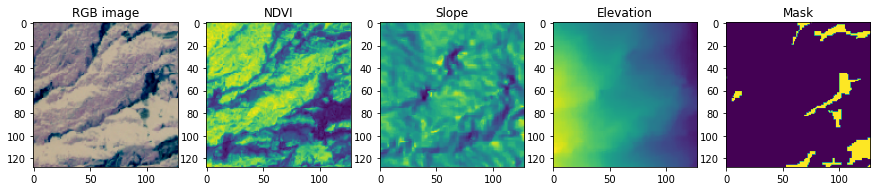

In [13]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [18]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


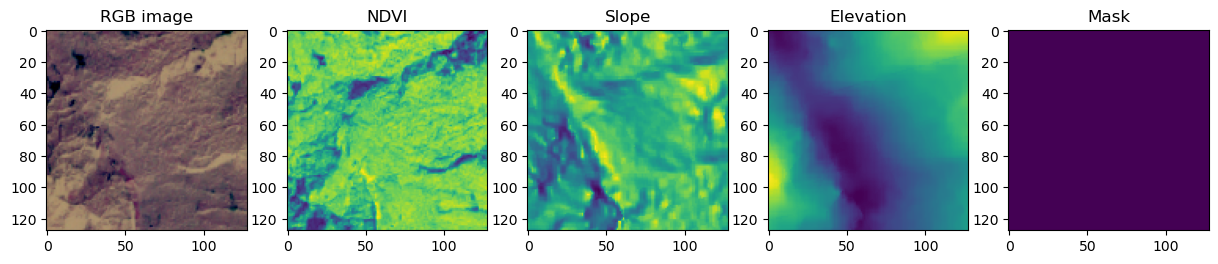

In [19]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [20]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [21]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


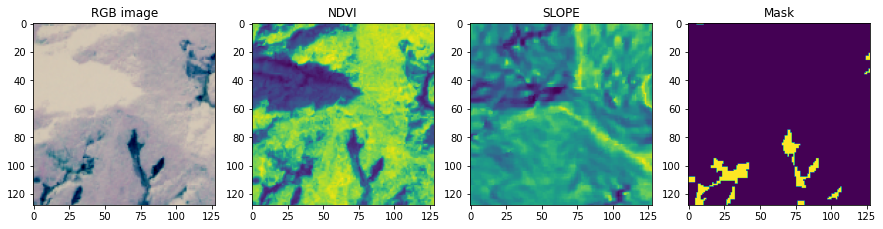

In [19]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [24]:
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Unet Model

In [26]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [31]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="val_f1_m", verbose=2, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=50, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.keras")

Epoch 1/50

Epoch 1: val_f1_m improved from -inf to 0.52981, saving model to best_model.keras
190/190 - 17s - 89ms/step - accuracy: 0.9728 - f1_m: 0.2161 - loss: 0.0751 - precision_m: 0.5143 - recall_m: 0.1754 - val_accuracy: 0.9825 - val_f1_m: 0.5298 - val_loss: 0.0500 - val_precision_m: 0.7195 - val_recall_m: 0.4344
Epoch 2/50

Epoch 2: val_f1_m improved from 0.52981 to 0.59454, saving model to best_model.keras
190/190 - 3s - 18ms/step - accuracy: 0.9831 - f1_m: 0.5505 - loss: 0.0459 - precision_m: 0.6934 - recall_m: 0.4799 - val_accuracy: 0.9846 - val_f1_m: 0.5945 - val_loss: 0.0442 - val_precision_m: 0.7446 - val_recall_m: 0.5048
Epoch 3/50

Epoch 3: val_f1_m improved from 0.59454 to 0.66445, saving model to best_model.keras
190/190 - 3s - 17ms/step - accuracy: 0.9847 - f1_m: 0.5870 - loss: 0.0409 - precision_m: 0.7364 - recall_m: 0.5133 - val_accuracy: 0.9853 - val_f1_m: 0.6645 - val_loss: 0.0376 - val_precision_m: 0.6870 - val_recall_m: 0.6551
Epoch 4/50

Epoch 4: val_f1_m did no

In [32]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.030506350100040436 0.9880462884902954 0.728377640247345 0.7709100842475891 0.6923596858978271


# Prediction

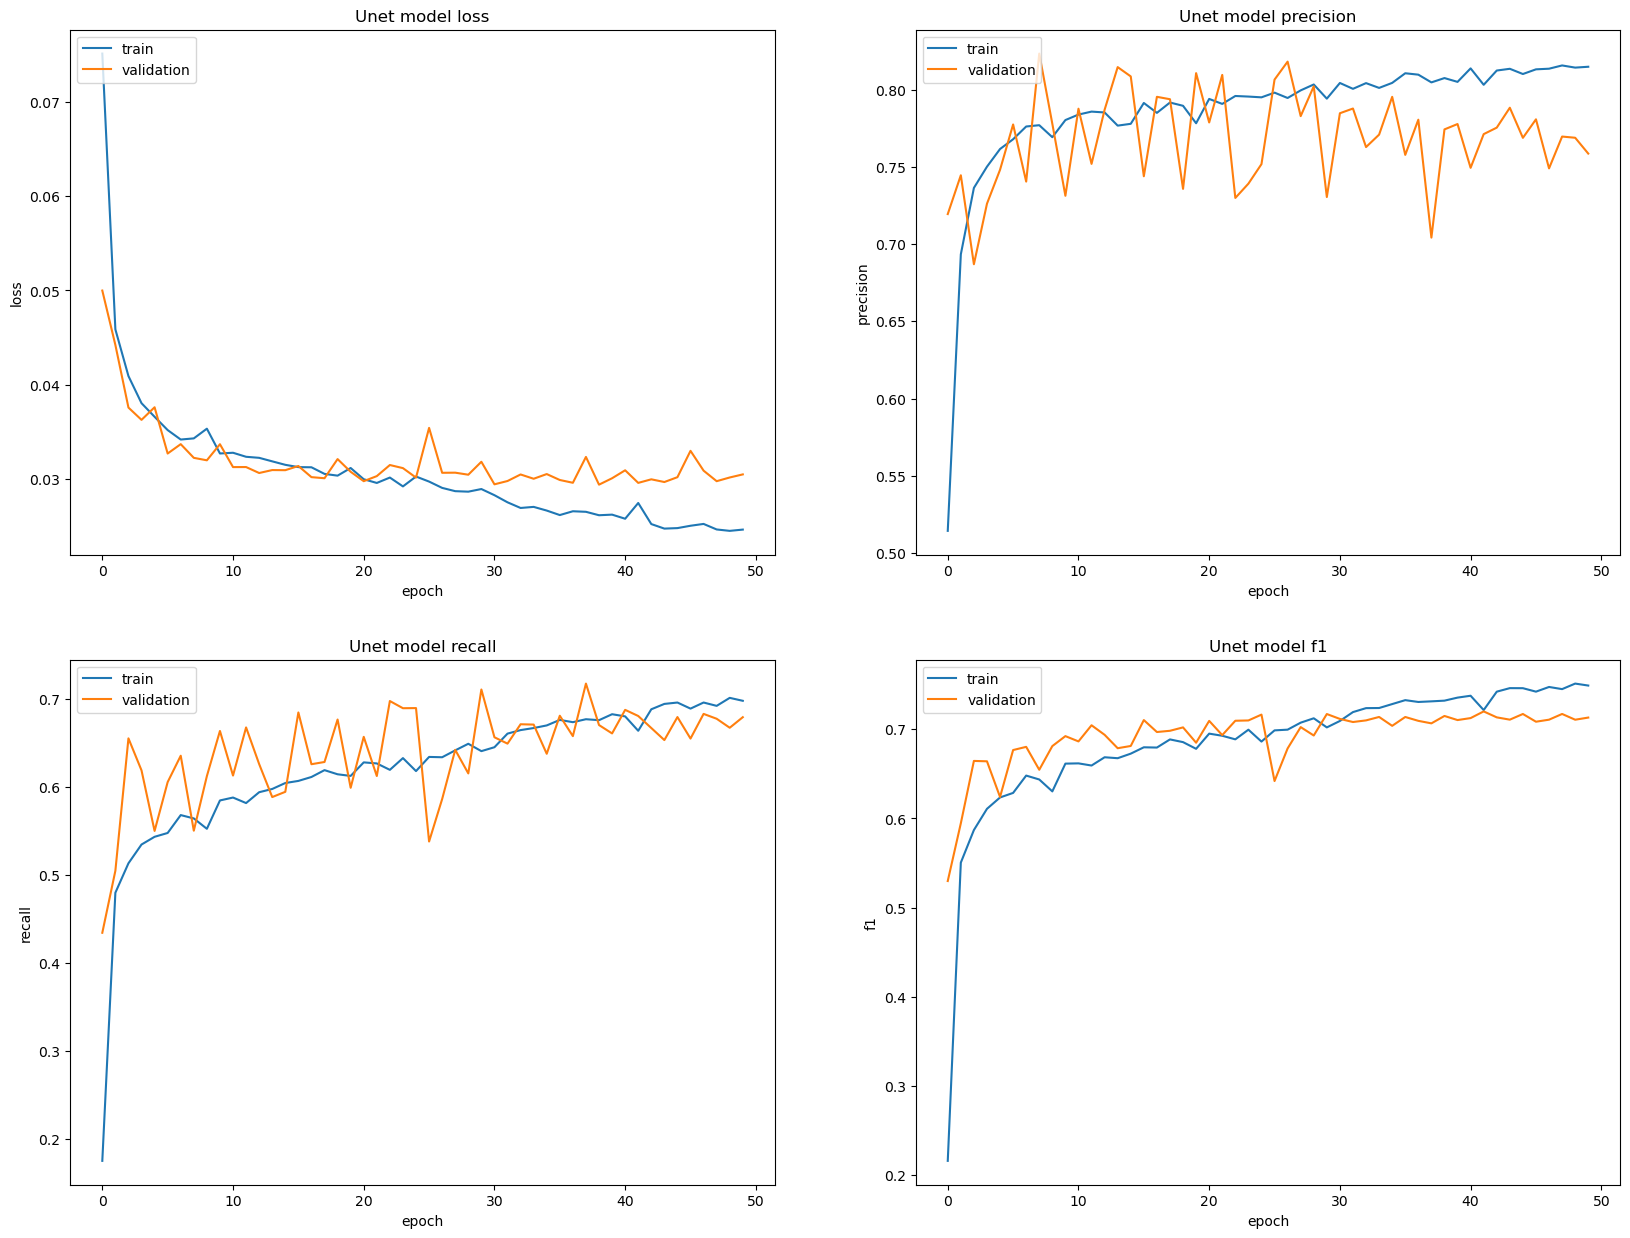

In [33]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

plt.savefig('_metrics.png')

In [34]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

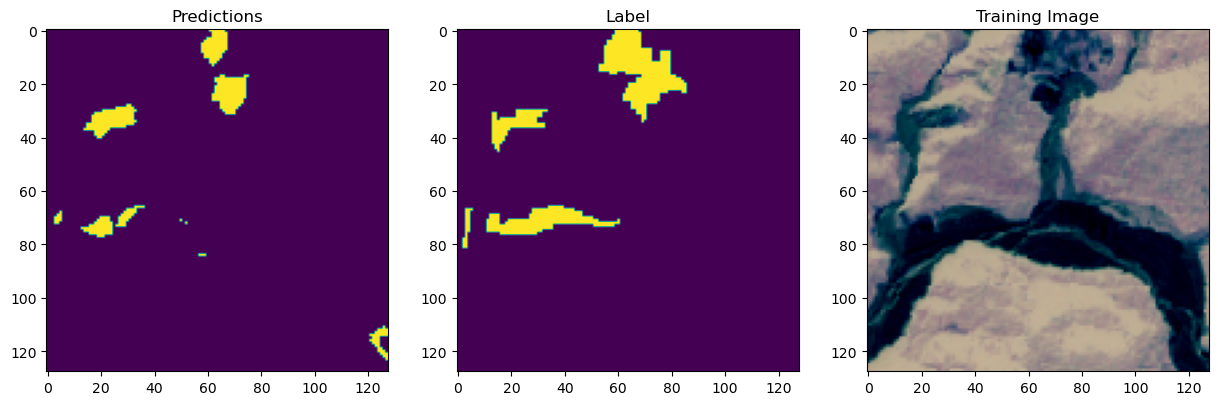

In [35]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# SGD Model

In [44]:
def unet_model_adam(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='Lion', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [45]:
sgd_model = unet_model_adam(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("SGD_model.keras", monitor="val_f1_m", verbose=2, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history_gd = model.fit(x_train, y_train, batch_size=16,  
          epochs=50, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

sgd_model.save("SGD_model.keras")

Epoch 1/50

Epoch 1: val_f1_m improved from -inf to 0.72155, saving model to SGD_model.keras
190/190 - 3s - 18ms/step - accuracy: 0.9920 - f1_m: 0.8040 - loss: 0.0193 - precision_m: 0.8416 - recall_m: 0.7715 - val_accuracy: 0.9878 - val_f1_m: 0.7216 - val_loss: 0.0331 - val_precision_m: 0.7398 - val_recall_m: 0.7096
Epoch 2/50

Epoch 2: val_f1_m did not improve from 0.72155
190/190 - 3s - 18ms/step - accuracy: 0.9920 - f1_m: 0.8090 - loss: 0.0193 - precision_m: 0.8451 - recall_m: 0.7776 - val_accuracy: 0.9880 - val_f1_m: 0.7139 - val_loss: 0.0339 - val_precision_m: 0.7653 - val_recall_m: 0.6754
Epoch 3/50

Epoch 3: val_f1_m did not improve from 0.72155
190/190 - 3s - 18ms/step - accuracy: 0.9919 - f1_m: 0.8042 - loss: 0.0195 - precision_m: 0.8415 - recall_m: 0.7720 - val_accuracy: 0.9881 - val_f1_m: 0.7177 - val_loss: 0.0325 - val_precision_m: 0.7649 - val_recall_m: 0.6820
Epoch 4/50

Epoch 4: val_f1_m did not improve from 0.72155
190/190 - 3s - 17ms/step - accuracy: 0.9919 - f1_m: 0.8

In [46]:
loss_, accuracy_, f1_score_, precision_, recall_ = sgd_model.evaluate(x_valid, y_valid, verbose=0)
print(loss_, accuracy_, f1_score_, precision_, recall_)

0.586273729801178 0.8826344013214111 0.028031976893544197 0.017937181517481804 0.07169798761606216


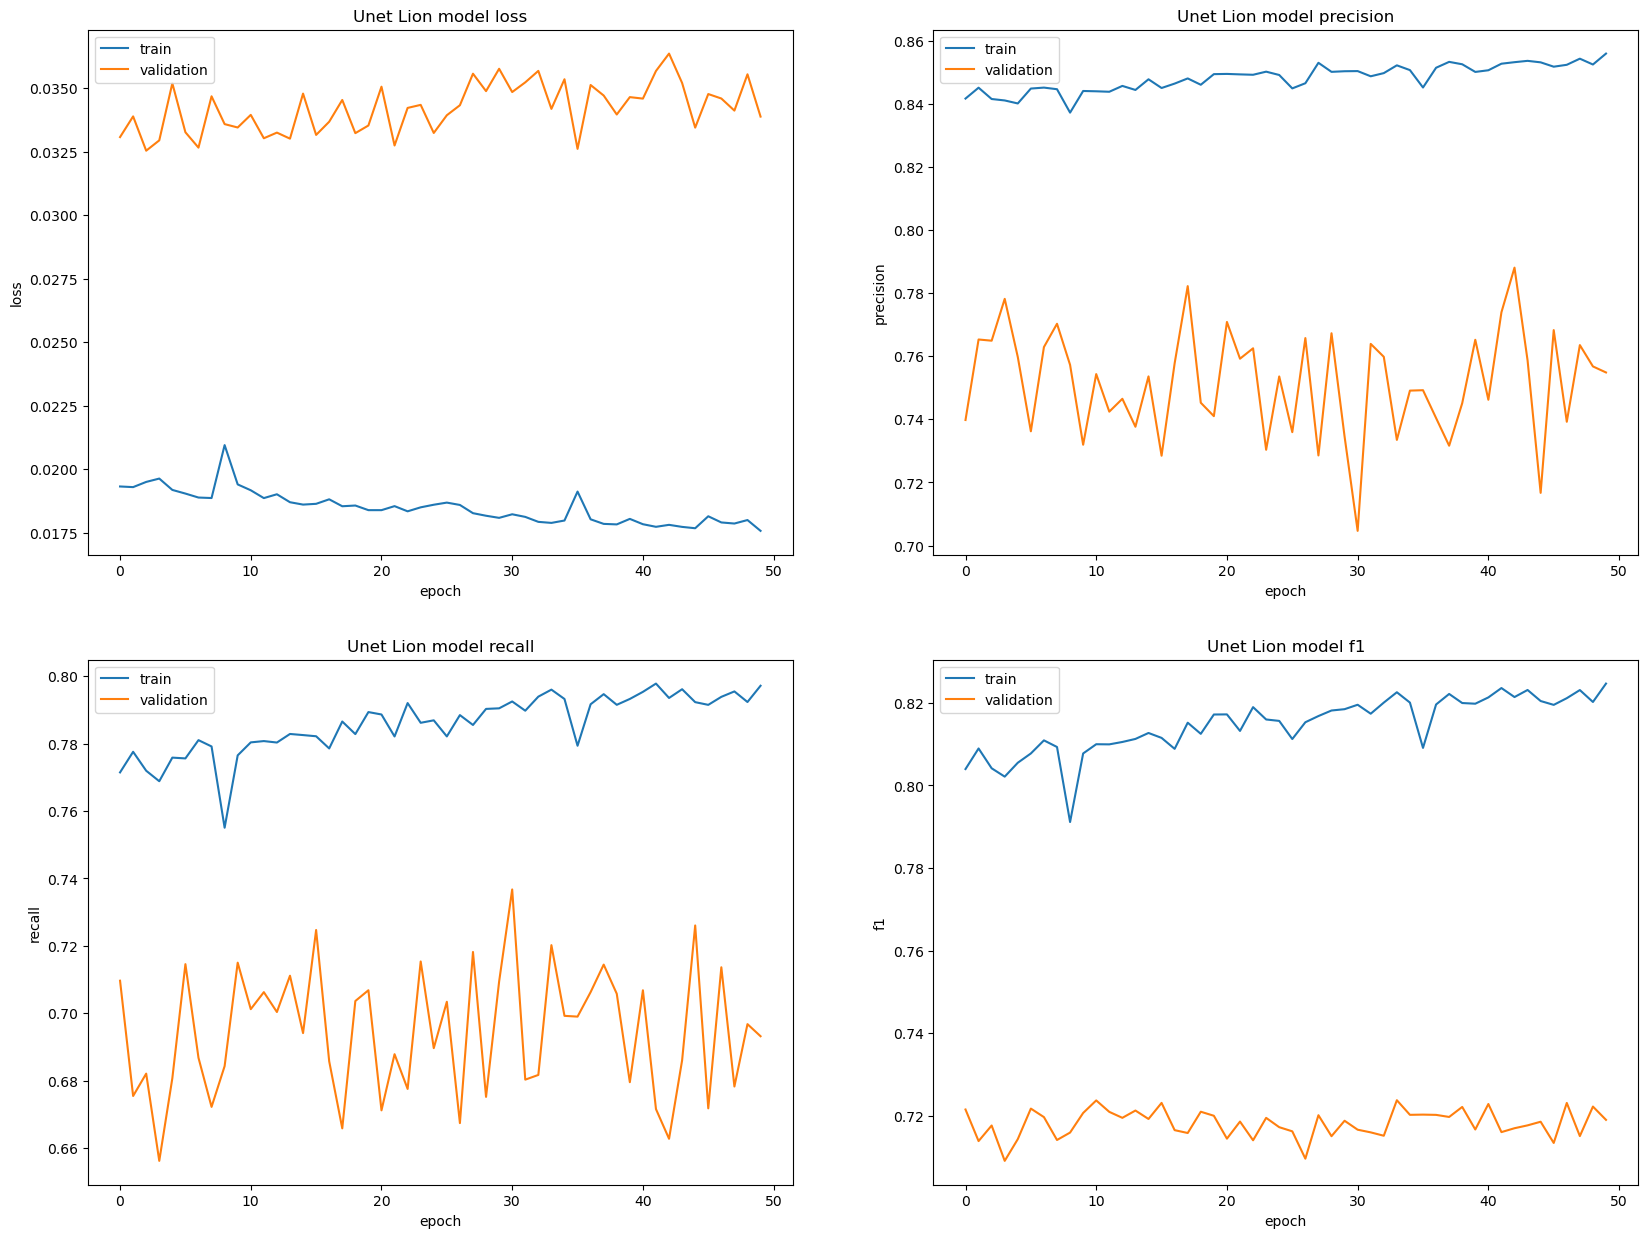

In [50]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history_gd.history['loss'])
ax11.plot(history_gd.history['val_loss'])
ax11.title.set_text('Unet Lion model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history_gd.history['precision_m'])
ax12.plot(history_gd.history['val_precision_m'])
ax12.set_title('Unet Lion model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history_gd.history['recall_m'])
ax13.plot(history_gd.history['val_recall_m'])
ax13.set_title('Unet Lion model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history_gd.history['f1_m'])
ax14.plot(history_gd.history['val_f1_m'])
ax14.set_title('Unet Lion model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

plt.savefig('lion_metrics.png')

In [48]:
threshold = 0.5
pred_img = sgd_model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

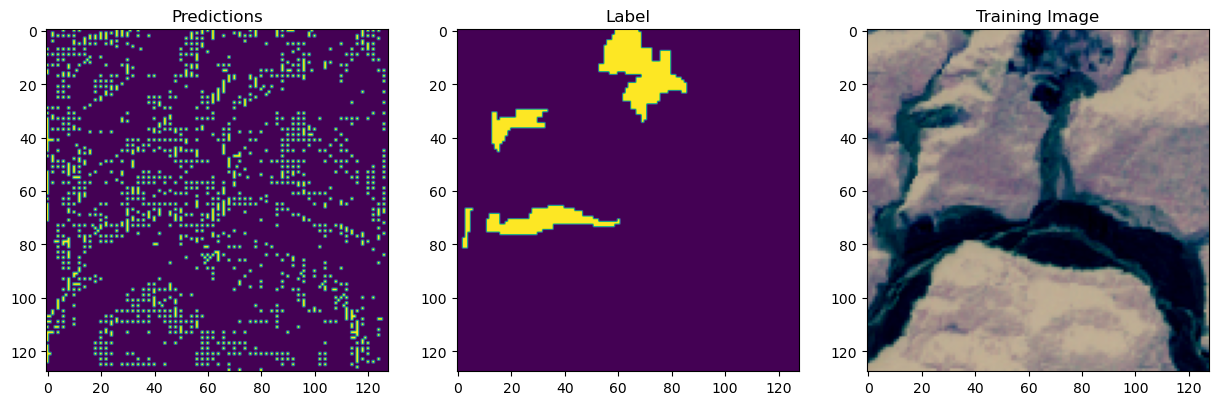

In [49]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')